# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns

In [19]:
# loading data
uom_space_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/uom-space.xlsx')
rm_category_type_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/rm-category-type-py-compatible.xlsx')
em_location_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/em-location.xlsx')
av_equipment_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/av-equipment.xlsx')
timetable_2020_df = pd.read_excel('C:/Users/deshp/Desktop/study material/DS/project/MAST90106/project-data/2020-timetable.xlsx')


In [21]:
uom_space_df.head()


Campus Code                object
Building Code              object
Building Name              object
Floor Code                 object
Room Code                  object
Room Name                  object
Room Category               int64
Room Type                   int64
Room Type Abbreviation     object
Room Capacity             float64
Room Area m²              float64
Room Condition 2018        object
Department Code            object
Room Location Code         object
dtype: object

In [4]:
def plotdata(dataframe):
    missing_data = dataframe.isnull().sum()
    df = pd.DataFrame({'name':missing_data.index, 'count':missing_data.values})

    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'name', y = 'count', data=df)
    plt.xticks(rotation = 90)
    plt.show()

#check percentage of missing data in uom space dataset
    for col in dataframe.columns:
        pct_missing = np.mean(dataframe[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

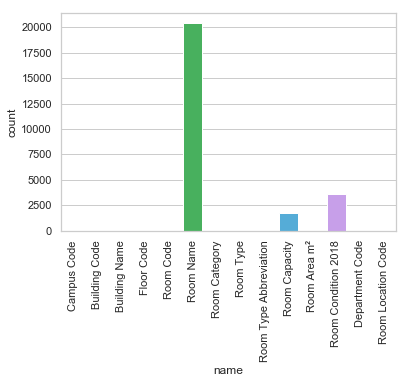

Campus Code - 0.0%
Building Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Room Name - 92.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 8.0%
Room Area m² - 0.0%
Room Condition 2018 - 16.0%
Department Code - 0.0%
Room Location Code - 0.0%


In [5]:
plotdata(uom_space_df)

In [6]:
#replace missing values for Room Name,Room condition, Room capacity, putting default value as 0 for room capacity and 'Missing' for Room condition and room name.
# Excluding the data like room name which has over 90% missing value will make the result skewed or less accurate.
# discuss with other team members on their take on this.

uom_space_df['Room Name'] = uom_space_df['Room Name'].fillna('_MISSING_')
uom_space_df['Room Condition 2018'] = uom_space_df['Room Condition 2018'].fillna('_MISSING_')
uom_space_df['Room Capacity'] = uom_space_df['Room Capacity'].fillna(0)

In [15]:
# clean room category data
rm_category_type_df.head()

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
0,1,100,Office - Other,Office - Other ...,"to be used, as the last resort, for any ""offic..."
1,1,101,Office Academic,Office - Academic Staff ...,a room with office furniture which provides ac...
2,1,102,Office Research,Office - Research Staff ...,a room with office furniture which provides ac...
3,1,103,Office Grad Res,Office - Graduate Researcher ...,a room with office furniture which provides ac...
4,1,104,Off-Tech,Office - Technical/Laboratory/Store Staff ...,a room with office furniture which provides ac...


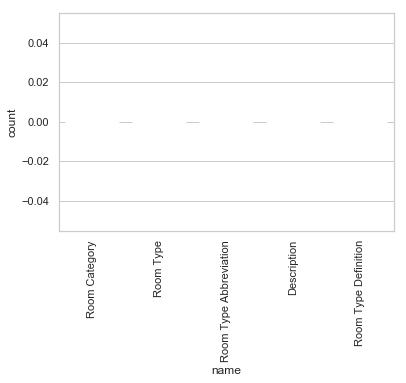

Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Description - 0.0%
Room Type Definition - 0.0%


In [11]:
plotdata(rm_category_type_df)
# since the room type data is clear, no need to clean the data. Since we need to join the data for analysis purpose. 
# We check for the missing data on the join between room category and the uom space datasets.

In [9]:
#converting the data type of Room Category and merging the data type
uom_space_df['Room Type'] = uom_space_df['Room Type'].astype('str').str.strip()
rm_category_type_df['Room Type']=rm_category_type_df['Room Type'].str.strip()
rm_category_type_df['Room Category']=rm_category_type_df['Room Category'].str.strip()
rm_category_type_df['Room Type Definition']=rm_category_type_df['Room Type Definition'].str.lower().str.strip()
joined_uom_space_df = pd.merge(uom_space_df,rm_category_type_df,on=['Room Type'],how='left')
joined_uom_space_df.shape
# print(uom_space_df.dtypes,rm_category_type_df.dtypes)

(22166, 18)

In [10]:
joined_uom_space_df.isnull().sum()

#deleting duplicate columns
del joined_uom_space_df['Room Category_y']
del joined_uom_space_df['Room Type Abbreviation_y']

In [13]:
em_location_df.head(50)

,Employee Sequential ID,Building Code,Floor Code,Room Code
0,1,102,4.0,438.01
1,2,102,0.0,G21.01
2,3,102,3.0,332.01
3,4,102,3.0,333.03
4,5,102,0.1,B08F
5,6,102,3.0,374.01
6,7,102,5.0,502.01
7,8,102,3.0,369.01
8,9,102,3.0,368.01
9,10,102,5.0,554.01
